In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree
from scipy.stats import mode


import warnings
warnings.filterwarnings('ignore')

In [18]:
import shutil
import os

# .kaggle 폴더 만들기
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# kaggle.json 파일을 .kaggle 폴더로 복사
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))

'C:\\Users\\snowb/.kaggle/kaggle.json'

In [20]:

import subprocess

# kaggle API를 통해 데이터셋 다운로드
os.system('kaggle datasets download -d debasisdotcom/parkinson-disease-detection')


0

In [21]:
# 다운로드된 파일 이름 확인
zip_file = 'parkinson-disease-detection.zip'  # 다운로드 파일 이름이 이거라고 가정할게
# 만약 다른 이름(smoker-status-prediction.zip)이면 이 변수 이름 바꿔야 해


In [22]:

# 압축 풀기
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('./')  # 현재 폴더에 풀기

# 0단계 데이터 불러오기 (csv 읽기)

In [16]:
import pandas as pd

df = pd.read_csv("Parkinsson disease.csv")

print(f"전체 데이터 수: {len(df)}")
df.head()

전체 데이터 수: 195


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 1단계 EDA (탐색적 데이터 분석) 

In [17]:
# 행/열 개수 확인(데이터 크기 파악)
print(df.shape)
# 컬럼 구조, 타입, 결측치 확인(전처리할 부분 파악)
print(df.info())
# 데이터 일부 미리 보기(이상치/컬럼 문제 빠르게 체크)
df.head()

(195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [18]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<table>
  <thead>
    <tr>
      <th>통계량</th>
      <th>의미</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b style="color: red;">count</b></td>
      <td>데이터 개수 (결측치 제외한 수)</td>
    </tr>
    <tr>
      <td><b style="color: red;">mean</b></td>
      <td>평균 (Average)</td>
    </tr>
    <tr>
      <td><b style="color: red;">std</b></td>
      <td>표준편차 (데이터 퍼진 정도)</td>
    </tr>
    <tr>
      <td><b style="color: red;">min</b></td>
      <td>최솟값</td>
    </tr>
    <tr>
      <td><b style="color: red;">25%</b></td>
      <td>1사분위수 (Q1) — 하위 25% 지점</td>
    </tr>
    <tr>
      <td><b style="color: red;">50%</b></td>
      <td>중간값 (Median, Q2)</td>
    </tr>
    <tr>
      <td><b style="color: red;">75%</b></td>
      <td>3사분위수 (Q3) — 상위 25% 지점</td>
    </tr>
    <tr>
      <td><b style="color: red;">max</b></td>
      <td>최댓값</td>
    </tr>
  </tbody>
</table>


# 2단계	결측치 확인

In [19]:
# df.isnull() 각 셀에 대한 NULL(결측치) True, 아니면 False표시
# .sum() True를 1로, False를 0으로 계산하여 컬럼별 결측치 개수 합산
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# 3단계 필요 없는 컬럼 제거

In [20]:
# 'name'이라는 컬럼을 데이터프레임(df)에서 삭제(drop), inplace=True >> 현재 df에 바로 반영
# 'name'은 질병 예측과는 아무 상관 없는 파일이름으로 삭제함
df.drop(columns='name',inplace=True)

# 4단계 데이터 분포 시각화

'\n한쪽으로 몰려 있으면 데이터가 왜곡(skewed) 되어 있음\n양쪽 끝이 튀어나와 있으면 이상치(outlier)가 있을 가능성\n종 모양 (정규분포처럼)이면 \t데이터가 잘 퍼져 있음 (모델 학습에 유리)\n>>>  만약 데이터가 너무 심하게 치우쳐 있으면 로그 변환(log transform) 같은 전처리를 고려할 수 있음\n'

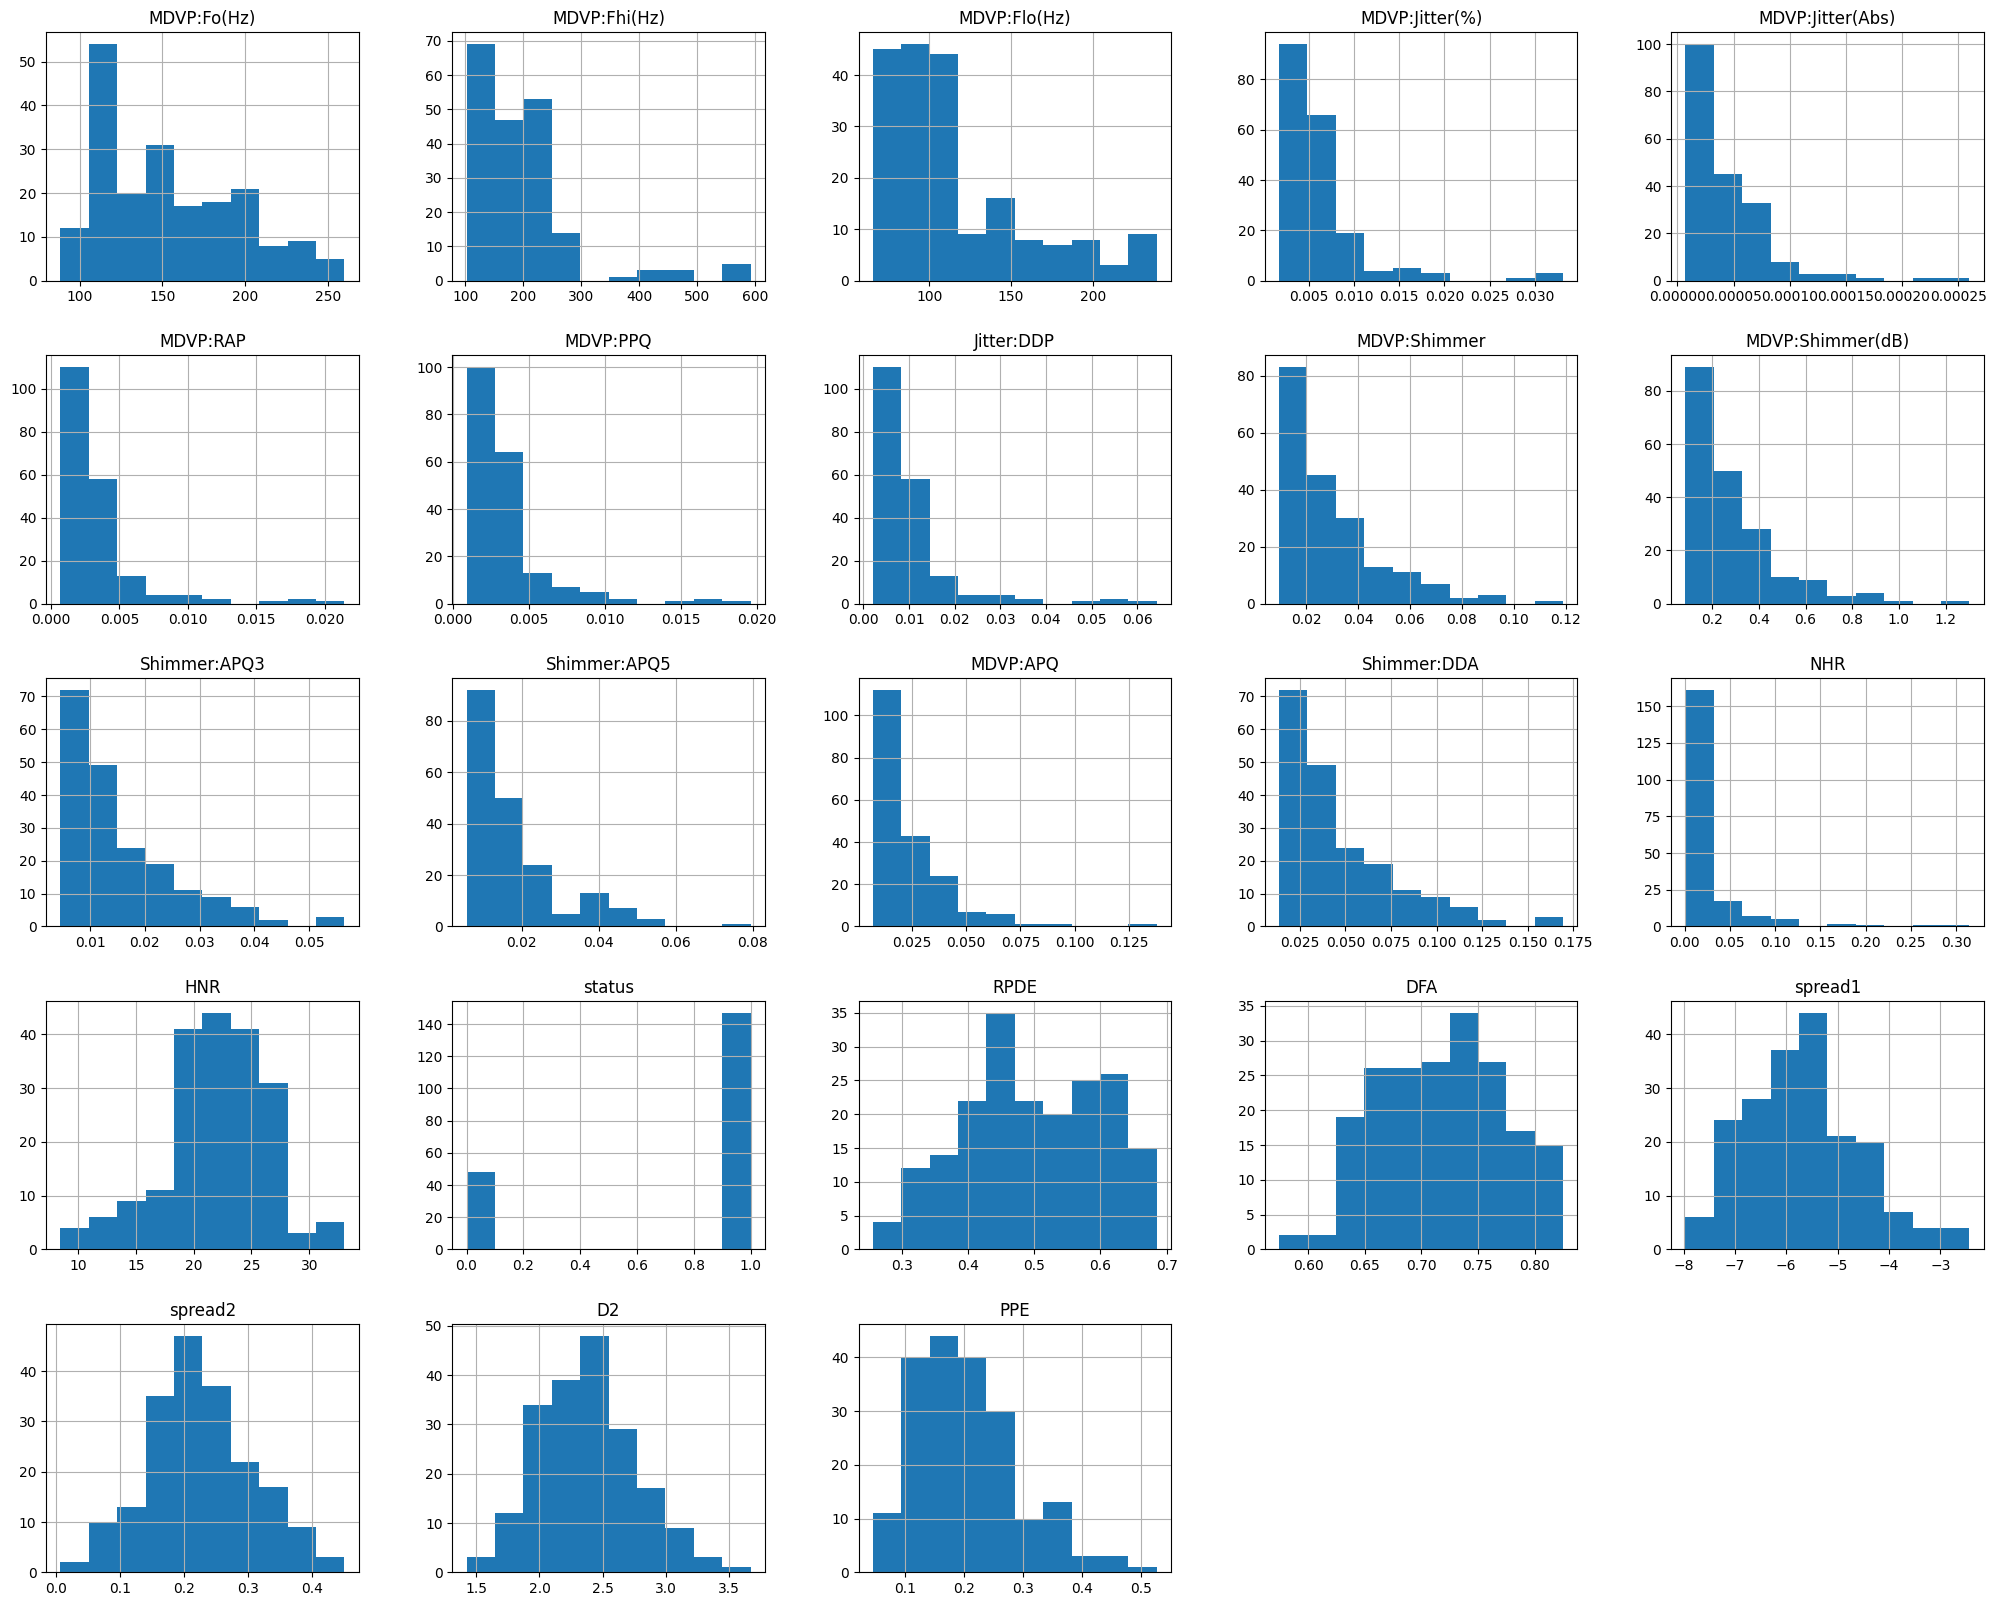

In [21]:
# df에 있는 수치형 컬럼(숫자형 데이터)들을 가로 25, 세로 20 크기로 출력
df.hist(figsize=(25,20));

'''
한쪽으로 몰려 있으면 데이터가 왜곡(skewed) 되어 있음
양쪽 끝이 튀어나와 있으면 이상치(outlier)가 있을 가능성
종 모양 (정규분포처럼)이면 	데이터가 잘 퍼져 있음 (모델 학습에 유리)
>>>  만약 데이터가 너무 심하게 치우쳐 있으면 로그 변환(log transform) 같은 전처리를 고려할 수 있음
'''


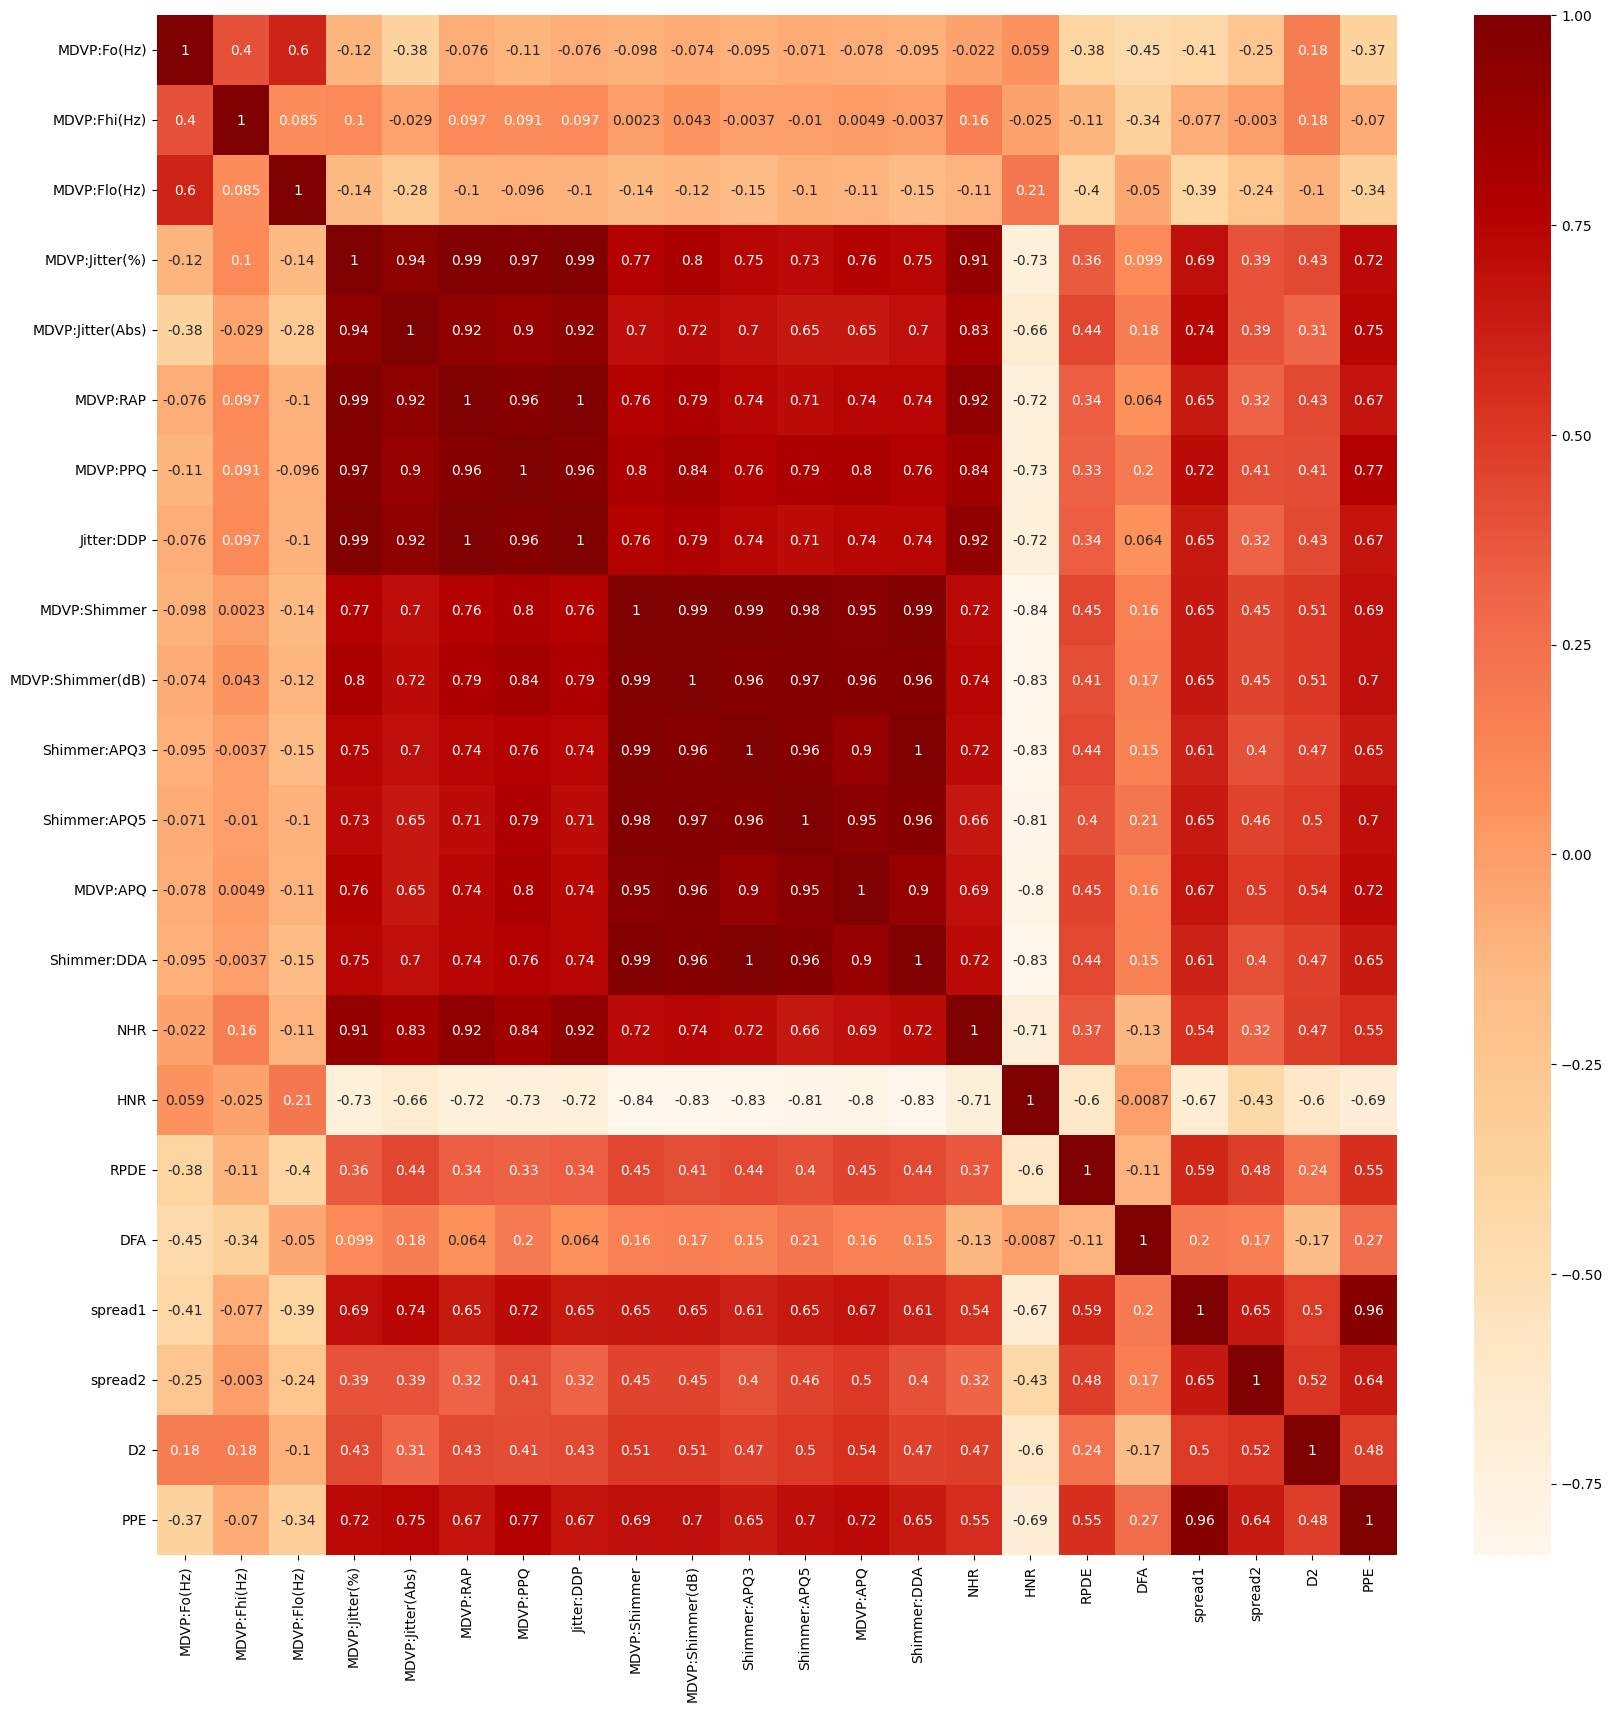

In [22]:
# 변수 간 상관관계(코릴레이션)를 한눈에 보기 위한 작업
#'status' 컬럼은 제거하고(정답 레이블이니까) Pearson 상관계수를 계산(두 변수 간의 선형관계를 -1 ~ 1 사이 숫자로 나타낸 것)
correl=df.drop(columns='status').corr()

# 그림크기를 가로 20, 세로 20으로 설정(상관계수 행렬이 컬럼 수만큼 커서 크기를 키워야 안 겹침)
plt.figure(figsize=(20,20))

# 히트맵(heatmap) 을 그리기,  sns.heatmap(계산한 상관계수 테이블,annot=True(상관계수 숫자를 각 칸에 표시),cmap='OrRd'(오렌지~빨강(Orange-Red) 계열 색상, 높은 상관일수록 빨강))
sns.heatmap(correl,annot=True,cmap='OrRd')
plt.show()

| 상관계수 범위 | 해석 |
|--------------|---------------------------|
| 0.0 ~ 0.3    | 거의 상관없음               |
| 0.3 ~ 0.7    | 약한 상관관계               |
| 0.7 ~ 0.9    | 강한 상관관계               |
| 0.9 ~ 1.0    | 매우 강한 상관관계 (거의 같은 변수처럼 움직임) |


# 5단계 Feature(X) / Label(y) 분리

In [23]:
# status만 제외하고 X에 담기
X = df.drop(columns='status')
# status만 Y에 담기
y=df['status']

# X(입력) → y(출력) 을 예측하는 구조로 학습

In [24]:
# X, y를 학습용(train)과 테스트용(test) 데이터로 나눔
'''
test_size=0.2
➔ 데이터의 20%를 테스트 데이터로 사용한다.
➔ 나머지 80%는 학습(train) 데이터로 사용한다.
random_state=42
➔ 데이터 분할을 항상 똑같이 하게 만드는 "씨앗(seed)" 설정이다.
➔ 결과 재현 가능 (다시 돌려도 항상 같은 데이터 분할 결과가 나온다!) , 보통 42 사용
'''
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# (행 수, 열 수)출력, 데이터 분할이 제대로 됐는지 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(156, 22)
(156,)
(39, 22)
(39,)


In [ ]:
# Scale Data Using StandardScaler 
# Z-Score 정규화, StandardScaler 객체를 만든다.  데이터를 평균 0, 표준편차 1로 표준화
scaler=StandardScaler()

# 평균과 표준편차를 계산(fit)하고 그걸 기준으로 변환(transform) 여기에서는 test도 fit을 적용함??
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [25]:
# 원래 머신러닝에서는 위 처럼 안씀!!!
scaler = StandardScaler()

############ 테스트 데이터(X_test)는 절대 학습(=fit) 정보에 관여하면 안 된다.
X_train = scaler.fit_transform(X_train)  # X_train을 기준으로 평균, 표준편차 계산 + 변환
X_test = scaler.transform(X_test)        # 계산된 값으로 X_test만 변환

StandardScaler 매서드
| 메서드 | 하는 일 | 간단 설명 |
|:---|:---|:---|
| `.fit(X)` | 평균과 표준편차 계산만 한다 | 데이터를 "공부"만 함 (변환은 안 함) |
| `.transform(X)` | 이미 계산된 평균/표준편차로 변환만 한다 | 실제로 데이터 변환 |
| `.fit_transform(X)` | fit + transform을 한 번에 한다 | 가장 많이 씀 (학습 + 변환 동시에) |
| `.inverse_transform(X_scaled)` | 변환된 데이터를 원래 스케일로 되돌린다 | 복구할 때 사용 |


In [28]:
# Accuracy Of the model if we predict only max target
'''
y.value_counts (정답 데이터)에서 각 클래스(0 또는 1)가 나오는 비율을 계산
normalize=True를 주면 "개수" 대신 "비율"이 나옴
.max() 가장 많은 클래스 비율을 가져옴
baseline 구하기
'''
score_baseline = y.value_counts(normalize=True).max()
score_baseline

np.float64(0.7538461538461538)

In [29]:
# Logistic Regression
# LogisticRegression 모델 객체를 만들고 random_state=42를 줘서 내부 최적화 과정을 고정시켜서, 결과를 재현 가능하게 함
logistic_model = LogisticRegression(random_state=42)

#X_train (입력 데이터)와 y_train (정답 레이블)을 이용해서 모델을 학습
logistic_model.fit(X_train, y_train)

# 학습한 모델로 X_test (테스트용 입력 데이터)에 대해 예측 결과(logistic_preds) 를 만듦
logistic_preds = logistic_model.predict(X_test)

| 항목 | 의미 |
|:---|:---|
| precision | 양성 예측 정확도 (예측한 것 중 실제로 맞은 비율) |
| recall | 실제 양성 중에서 예측에 성공한 비율 |
| f1-score | precision과 recall의 조화평균 (모델의 종합 정확성 지표) |
| support | 각 클래스별 샘플 수 (데이터 개수) |


In [30]:
print("Logistic Regression Classification Report:")

#분류 리포트(classification_report) 를 출력
print(classification_report(y_test, logistic_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



## 📚 클래스별 결과해석

### 클래스 0 (정상)

| 지표 | 값 | 해석 |
|:---|:---|:---|
| precision | 1.00 | "0이라고 예측한 것 중 실제로 100%가 정상이었다." (정확성은 매우 높음) |
| recall | 0.43 | "실제로 정상인 것 중 43%만 맞췄다." (정상 탐지율이 낮음) |
| f1-score | 0.60 | "Precision과 Recall을 종합하면 60점이다." (개선 필요) |
| support | 7개 | 테스트 데이터 중 정상은 7개 있었다. (데이터 수 적음) |

### 클래스 1 (환자)

| 지표 | 값 | 해석 |
|:---|:---|:---|
| precision | 0.89 | "1이라고 예측한 것 중 89%는 실제로 환자였다." (높은 정확성) |
| recall | 1.00 | "실제로 환자인 것 중 100%를 맞췄다." (완벽한 탐지) |
| f1-score | 0.94 | "Precision과 Recall을 종합하면 94점이다." (아주 우수함) |
| support | 32개 | 테스트 데이터 중 환자는 32개 있었다. (데이터 수 많음) |

---

### 📚 최종 평가 요약

| 항목 | 평가 |
|:---|:---|
| 환자(1) 분류 | 매우 잘함 (Recall 완벽, Precision도 높음) |
| 정상(0) 분류 | 약함 (Recall 낮음, 정상 탐지가 어려움) |
| 전체 정확도 | 90%로 매우 우수함 |
| 개선 포인트 | 클래스 0(정상) 분류 성능 개선 필요. 데이터 균형 조정 및 추가 모델 실험 고려 |


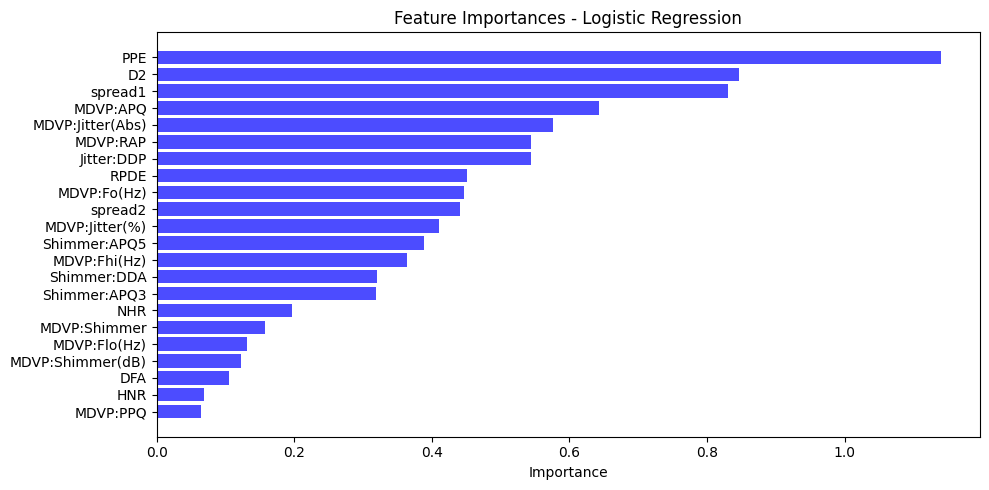

In [31]:
# Feature importance for Logistic Regression (using coefficients)
'''
특성(Feature) 하나하나가 결과에 얼마나 영향을 미쳤는지를 나타내는 값(importance)을 구하는 과정
logistic_model.coef_ : Logistic Regression에서 학습된 가중치(계수) 들을 가져온다.
np.abs(...) : 영향력 크기만 보기 위해 절댓값을 취한다.
.mean(axis=0) : 여러 클래스가 있을 경우 평균을 내준다.
'''
logistic_importances = np.abs(logistic_model.coef_).mean(axis=0)

# logistic_importances를 작은 값부터 큰 값 순으로 정렬해서 인덱스를 반환(중요도 순서 정렬)
sorted_indices = np.argsort(logistic_importances)

# 그림 사이즈 설정 (가로 10, 세로 5)
plt.figure(figsize=(10, 5))

'''
수평 막대 그래프(barh)를 그림
np.array(X.columns) : numpy array로 변환 (인덱싱을 위해)
[sorted_indices] : 중요도(importance) 낮은 순서대로 정렬된 인덱스를 적용
>> Feature 이름을 중요도 낮은 순서대로 정렬해서 가져오는 것
color='blue' : 막대의 색깔을 파란색
alpha=0.7 : 투명도를 설정
'''
plt.barh(np.array(X.columns)[sorted_indices], logistic_importances[sorted_indices], color='blue', alpha=0.7)

# 그래프 제목, x축 이름을 붙이고
plt.title("Feature Importances - Logistic Regression")
plt.xlabel("Importance")

# tight_layout()으로 레이아웃을 깔끔하게 정리(그래프 안의 글자(레이블, 제목, 축 이름)들이 겹치지 않게 자동으로 여백을 조정) 후 표시
plt.tight_layout()
plt.show()

In [32]:
# KNeighborsClassifier : K-최근접 이웃(K-Nearest Neighbors) 분류 모델 생성
# n_neighbors=5 : 가장 가까운 5개의 학습 데이터를 보고 가장 많은 클래스를 선택
knn_model = KNeighborsClassifier(n_neighbors=5)

# X_train (입력 데이터)와 y_train (정답 레이블)을 모델에 넣어서 KNN 알고리즘에 필요한 구조를 준비
knn_model.fit(X_train, y_train)

# 테스트 데이터 예측
knn_preds = knn_model.predict(X_test)

| 항목 | 의미 | 쉽게 풀이하면 |
|:---|:---|:---|
| **precision** | 양성 예측 정확도 | "내가 1이라고 예측한 것 중에서 실제로 맞은 비율" |
| **recall** | 재현율, 민감도 | "실제로 1인 것 중에서 내가 제대로 예측한 비율" |
| **f1-score** | precision과 recall의 조화평균 | "precision과 recall 둘 다 잘했는지 종합 점수" |
| **support** | 각 클래스별 샘플 수 | "0, 1 클래스에 각각 몇 개 데이터가 있었는지" |


In [33]:
# classification_report() y_test(진짜 정답)와 knn_preds(예측 결과)를 비교해서 Precision, Recall, F1-score, Support를 출력
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_preds))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



## 📚 클래스별 결과해석

### 클래스 0 (정상)

| 지표 | 값 | 해석 |
|:---|:---|:---|
| precision | 1.00 | "0이라고 예측한 것 중 실제로 100%가 정상이었다." (완벽한 정확성) |
| recall | 0.71 | "실제로 정상인 것 중 71%를 맞췄다." (양호한 탐지율) |
| f1-score | 0.83 | "Precision과 Recall을 종합하면 83점이다." (좋은 성능) |
| support | 7개 | 테스트 데이터 중 정상은 7개 있었다. (데이터 수 적음) |

### 클래스 1 (환자)

| 지표 | 값 | 해석 |
|:---|:---|:---|
| precision | 0.94 | "1이라고 예측한 것 중 94%는 실제로 환자였다." (높은 정확성) |
| recall | 1.00 | "실제로 환자인 것 중 100%를 맞췄다." (완벽한 탐지) |
| f1-score | 0.97 | "Precision과 Recall을 종합하면 97점이다." (아주 우수함) |
| support | 32개 | 테스트 데이터 중 환자는 32개 있었다. (데이터 수 많음) |

---

### 📚 최종 평가 요약

| 항목 | 평가 |
|:---|:---|
| 환자(1) 분류 | 매우 잘함 (Recall 완벽, Precision도 높음) |
| 정상(0) 분류 | 꽤 잘함 (Precision은 완벽, Recall은 괜찮은 수준) |
| 전체 정확도 | 95%로 매우 우수함 |
| 개선 포인트 | 정상(0) Recall을 더 높이면 모델 완성도가 더 올라갈 수 있음 |


In [34]:
# DecisionTreeClassifier : 분류용 의사결정나무 모델 생성, 결과를 고정시키기 위해 씨앗 설정, 나무 깊이를 최대 4단계까지만 허용(과적합방지)
tree_model = DecisionTreeClassifier(random_state=42,max_depth=4)

# 학습 데이터 (X_train, y_train)을 보고 의사결정 규칙(조건문들)을 학습
tree_model.fit(X_train, y_train) 

# 테스트 데이터 예측
tree_preds = tree_model.predict(X_test)

# 의사결정나무 모델의 성능을 전반적으로 평가 가능
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_preds))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



## 📚 클래스별 결과해석

### 클래스 0 (정상)

| 지표 | 값 | 해석 |
|:---|:---|:---|
| precision | 0.83 | "0이라고 예측한 것 중 실제로 83%가 정상이었다." (정확성 양호) |
| recall | 0.71 | "실제로 정상인 것 중 71%를 맞췄다." (탐지율은 무난) |
| f1-score | 0.77 | "Precision과 Recall을 종합하면 77점이다." (보통 이상 성능) |
| support | 7개 | 테스트 데이터 중 정상은 7개 있었다. (데이터 수 적음) |

### 클래스 1 (환자)

| 지표 | 값 | 해석 |
|:---|:---|:---|
| precision | 0.94 | "1이라고 예측한 것 중 94%는 실제로 환자였다." (높은 정확성) |
| recall | 0.97 | "실제로 환자인 것 중 97%를 맞췄다." (매우 높은 탐지율) |
| f1-score | 0.95 | "Precision과 Recall을 종합하면 95점이다." (우수한 성능) |
| support | 32개 | 테스트 데이터 중 환자는 32개 있었다. (데이터 수 많음) |

---

### 📚 최종 평가 요약

| 항목 | 평가 |
|:---|:---|
| 환자(1) 분류 | 매우 잘함 (Precision과 Recall 모두 높음) |
| 정상(0) 분류 | 양호하나 약간의 개선 여지 있음 (Recall 71%) |
| 전체 정확도 | 92%로 매우 우수함 |
| 개선 포인트 | 정상(0) 탐지 성능을 조금 더 향상시키면 모델 완성도 증가 |


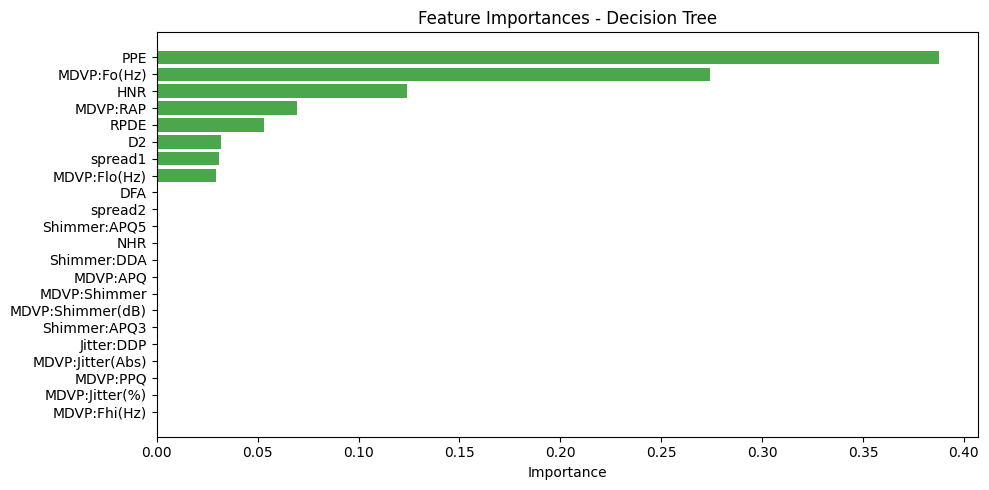

In [38]:
# Feature importance for Decision Tree
# 학습된 결정 트리가 각 특성(feature)에 대해 얼마나 중요한지(중요도 점수) 자동으로 계산해놓은 배열을 가져오는 것
# 트리가 분기를 결정할 때 어떤 특성을 얼마나 자주, 중요하게 썼는지를 수치로 표현
tree_importances = tree_model.feature_importances_

# 중요도 순서대로 정렬(오름차순으로 인덱스를 정렬)
sorted_indices = np.argsort(tree_importances)

# 그래프 그리기 (barh) 가로 10, 세로 5 사이즈
plt.figure(figsize=(10, 5))
plt.barh(np.array(X.columns)[sorted_indices], tree_importances[sorted_indices], color='green', alpha=0.7)
plt.title("Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

[Text(0.5131578947368421, 0.9, 'PPE <= -0.738\ngini = 0.387\nsamples = 156\nvalue = [41, 115]\nclass = MDVP:Fhi(Hz)'),
 Text(0.2631578947368421, 0.7, 'MDVP:Fo(Hz) <= 0.917\ngini = 0.408\nsamples = 42\nvalue = [30, 12]\nclass = MDVP:Fo(Hz)'),
 Text(0.38815789473684215, 0.8, 'True  '),
 Text(0.15789473684210525, 0.5, 'HNR <= 0.761\ngini = 0.488\nsamples = 19\nvalue = [8, 11]\nclass = MDVP:Fhi(Hz)'),
 Text(0.10526315789473684, 0.3, 'MDVP:Flo(Hz) <= 0.18\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = MDVP:Fo(Hz)'),
 Text(0.05263157894736842, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = MDVP:Fo(Hz)'),
 Text(0.15789473684210525, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = MDVP:Fhi(Hz)'),
 Text(0.21052631578947367, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = MDVP:Fhi(Hz)'),
 Text(0.3684210526315789, 0.5, 'D2 <= 0.872\ngini = 0.083\nsamples = 23\nvalue = [22, 1]\nclass = MDVP:Fo(Hz)'),
 Text(0.3157894736842105, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [22,

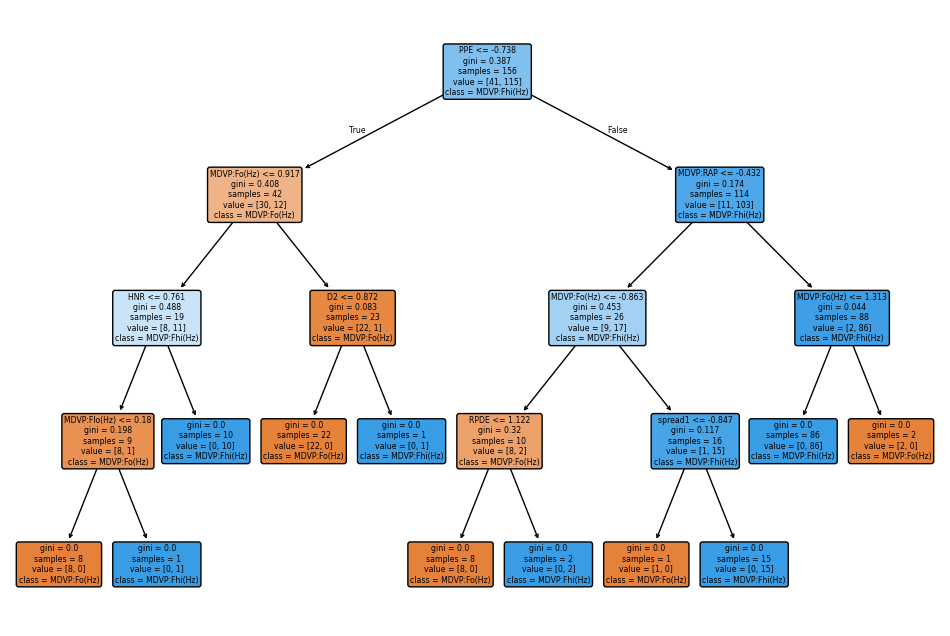

In [ ]:
# 가로 12, 세로 8 정도의 넉넉한 크기로 설정
plt.figure(figsize=(12, 8))

plot_tree(tree_model, feature_names=X.columns, class_names=df.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

| 파라미터 | 의미 |
|:---|:---|
| `tree_model` | 시각화할 트리 모델 |
| `feature_names=X.columns` | 각각 분기 기준이 된 feature 이름 표시 |
| `class_names=df.columns` | 분류된 결과(0, 1) 이름 표시 (주의: 여기 df.columns는 수정할 수도 있어!) |
| `filled=True` | 노드 안쪽을 클래스별 색으로 채운다 (더 보기 쉽게) |
| `rounded=True` | 박스 모서리를 둥글게 만든다 (더 부드럽고 보기 좋게) |


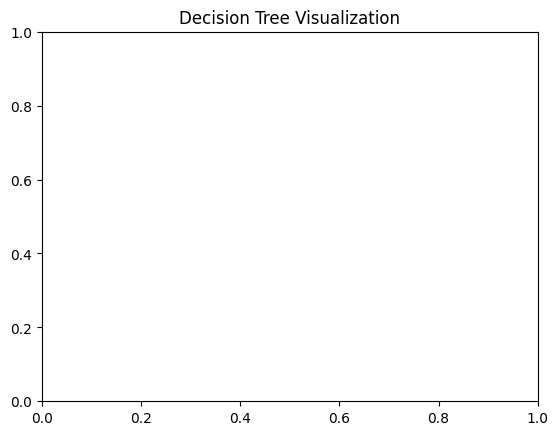

## 📋 Decision Tree 전체 흐름 요약

| 구간 | 분기 기준 | 주된 클래스 |
|:-----|:---------|:------------|
| Root Node (PPE) | PPE <= 0.738 | 환자(1) 많음 |
| 좌측 서브트리 (MDVP:Fo(Hz)) | 정상(0) 비율 높음 |
| 우측 서브트리 (MDVP:RAP) | 환자(1) 비율 압도적 |

---

## ✨ 한눈에 정리

- 트리 처음에는 **PPE (Pitch Period Entropy)** 가 제일 중요한 분기 feature로 사용되었다.
- 이후에는 **MDVP:Fo(Hz)**, **MDVP:RAP**, **HNR**, **D2**, **RPDE** 등의 음성 피처를 기준으로 추가 분기하였다.
- **우측 서브트리**(PPE 큰 쪽)는 환자(1) 비율이 거의 100%에 가깝다.
- **좌측 서브트리**(PPE 작은 쪽)는 정상(0)도 일부 섞여 있다.
- 전체적으로 **gini 지수**가 낮은 리프 노드가 많아, 데이터 분리가 양호하다.


In [ ]:
# Combine predictions using majority voting
# 여러 모델 결과를 합친 최종 예측값을 저장할 빈 리스트 준비
combined_preds = []
# i번째 샘플에 대해 각 모델이 뭘 예측했는지 확인
for i in range(len(logistic_preds)):
    # Count the occurrences of each class (0 or 1)
    # 지스틱 회귀, 결정 트리, KNN 각각의 i번째 예측값을 모은다
    votes = [logistic_preds[i], tree_preds[i], knn_preds[i]]
    vote_count = {0: 0, 1: 0}
    for vote in votes:
        # 0이 몇 표, 1이 몇 표 나왔는지 딕셔너리에 기록
        vote_count[vote] += 1

    # Take the class with the majority vote
    # 0표가 더 많으면 0을, 1표가 더 많으면 1을 최종 예측 결과로 추가
    combined_preds.append(0 if vote_count[0] > vote_count[1] else 1)

# Hard Voting Classifier (Majority Voting)
# "여러 모델의 예측 결과 중 다수결로 최종 예측을 정하는 방법"